In [1]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import os
import koreanize_matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from pandas.plotting import boxplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# ÎÇòÎàîÍ≥†Îîï Í≤ΩÎ°ú Ï∞æÍ∏∞ (macOS Í∏∞Ï§Ä)
font_path = fm.findfont("NanumGothic")
font_name = fm.FontProperties(fname=font_path).get_name()

# Ìè∞Ìä∏ÏôÄ ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ ÏÑ§Ï†ï
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

In [2]:

path = "./csv_dir/bank-additional-full.csv"

df = pd.read_csv(path, sep=";", header=0,
)
# age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : 4Îßå 1Ï≤úÍ∞ú
- Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞
- Ï∫†ÌéòÏù∏Îç∞Ïù¥ÌÑ∞
- Í≤ΩÏ†ú Îç∞Ïù¥ÌÑ∞

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## UnknownÍ∞úÏàò ÌôïÏù∏
- Ïñ¥ÏºÄ Ï≤òÎ¶¨ÌïòÎÉê

In [5]:
unknown_summary = (df == "unknown").sum().sort_values(ascending=False)

print(unknown_summary)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64


## y Ïª¨Îüº ÌôïÏù∏
- Í±∞Ïùò Î≠ê 9„Ñ∑1ÏûÑ. Ïù¥ÎûòÏÑú accuracy Ïì∞Î©¥ÏïàÎêúÎã§Í≥†. Îã§ ÌãÄÎ†∏Îã§Í≥†Ìï¥ÎèÑ Ï†ïÎãµÏú® 90ÌçºÏûÑ „Ñ∑„Ñ∑

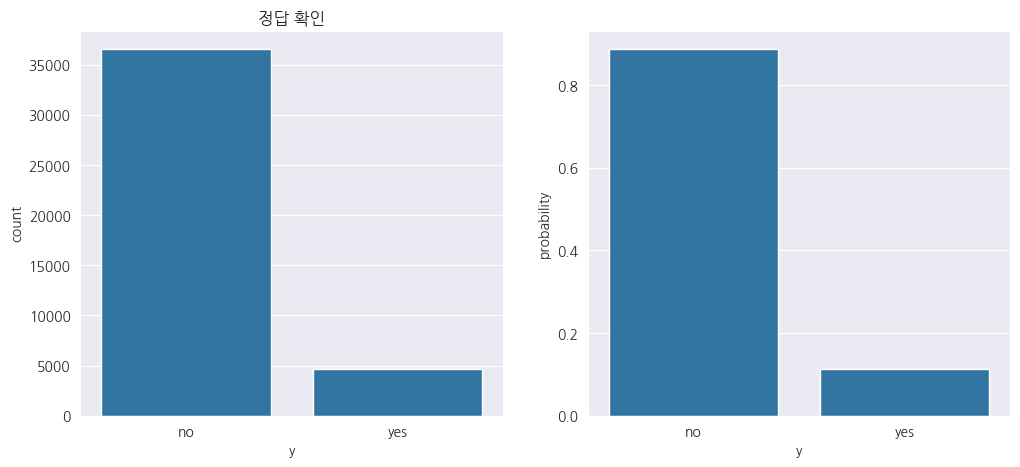

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


In [6]:

plt.figure(figsize = (12, 5))

plt.subplot(1,2,1)
plt.title("Ï†ïÎãµ ÌôïÏù∏")
sns.countplot(data = df, x = 'y')


plt.subplot(1,2,2)
sns.countplot(data = df, x = 'y', stat='probability')
plt.show()
print(df['y'].value_counts(normalize=True))

# Ï§ëÎ≥µÍ∞í ÌôïÏù∏
- ÏßÅÏóÖ, ÎÇòÏù¥, ÍµêÏú°, ÎåÄÏ∂úÏù¥ Í∞ôÏùÑÏàòÍ∞ÄÏûàÎÇò „Öá„Öá ÏûàÏßÄ
- Î¨ºÍ∞ÄÏßÄÏàò, Í≥†Ïö©Î≥ÄÎèôÎ•†, Í≥†Ïö©ÏûêÏàòÎäî Î™®Îì† ÏÇ¨ÎûåÏù¥ ÎòëÍ∞ôÏùÄÎç∞, Í∞ôÏùÄ week, monthÎ©¥ Í∞ôÏùÑ ÏàòÎèÑ ÏûàÎã§Í≥† ÏÉùÍ∞Å.
- Í∑∏Îüº Í∞úÏù∏Ï†ïÎ≥¥ÎèÑ Í∞ôÍ≥† Í≤ΩÏ†úÏ†ïÎ≥¥ÎèÑ Í∞ôÏùÑ ÏàòÎèÑ ÏûàÏùå.
- Í∑ºÎç∞ 12row ÎãàÍπê ÏßÄÏõåÎèÑ „Ñ±„ÖäÏùÑÎìØ...?

In [7]:
df = df.drop_duplicates()

# Í≤∞Ï∏°Ïπò ÌôïÏù∏
- ÏóÜÏùå

<Axes: >

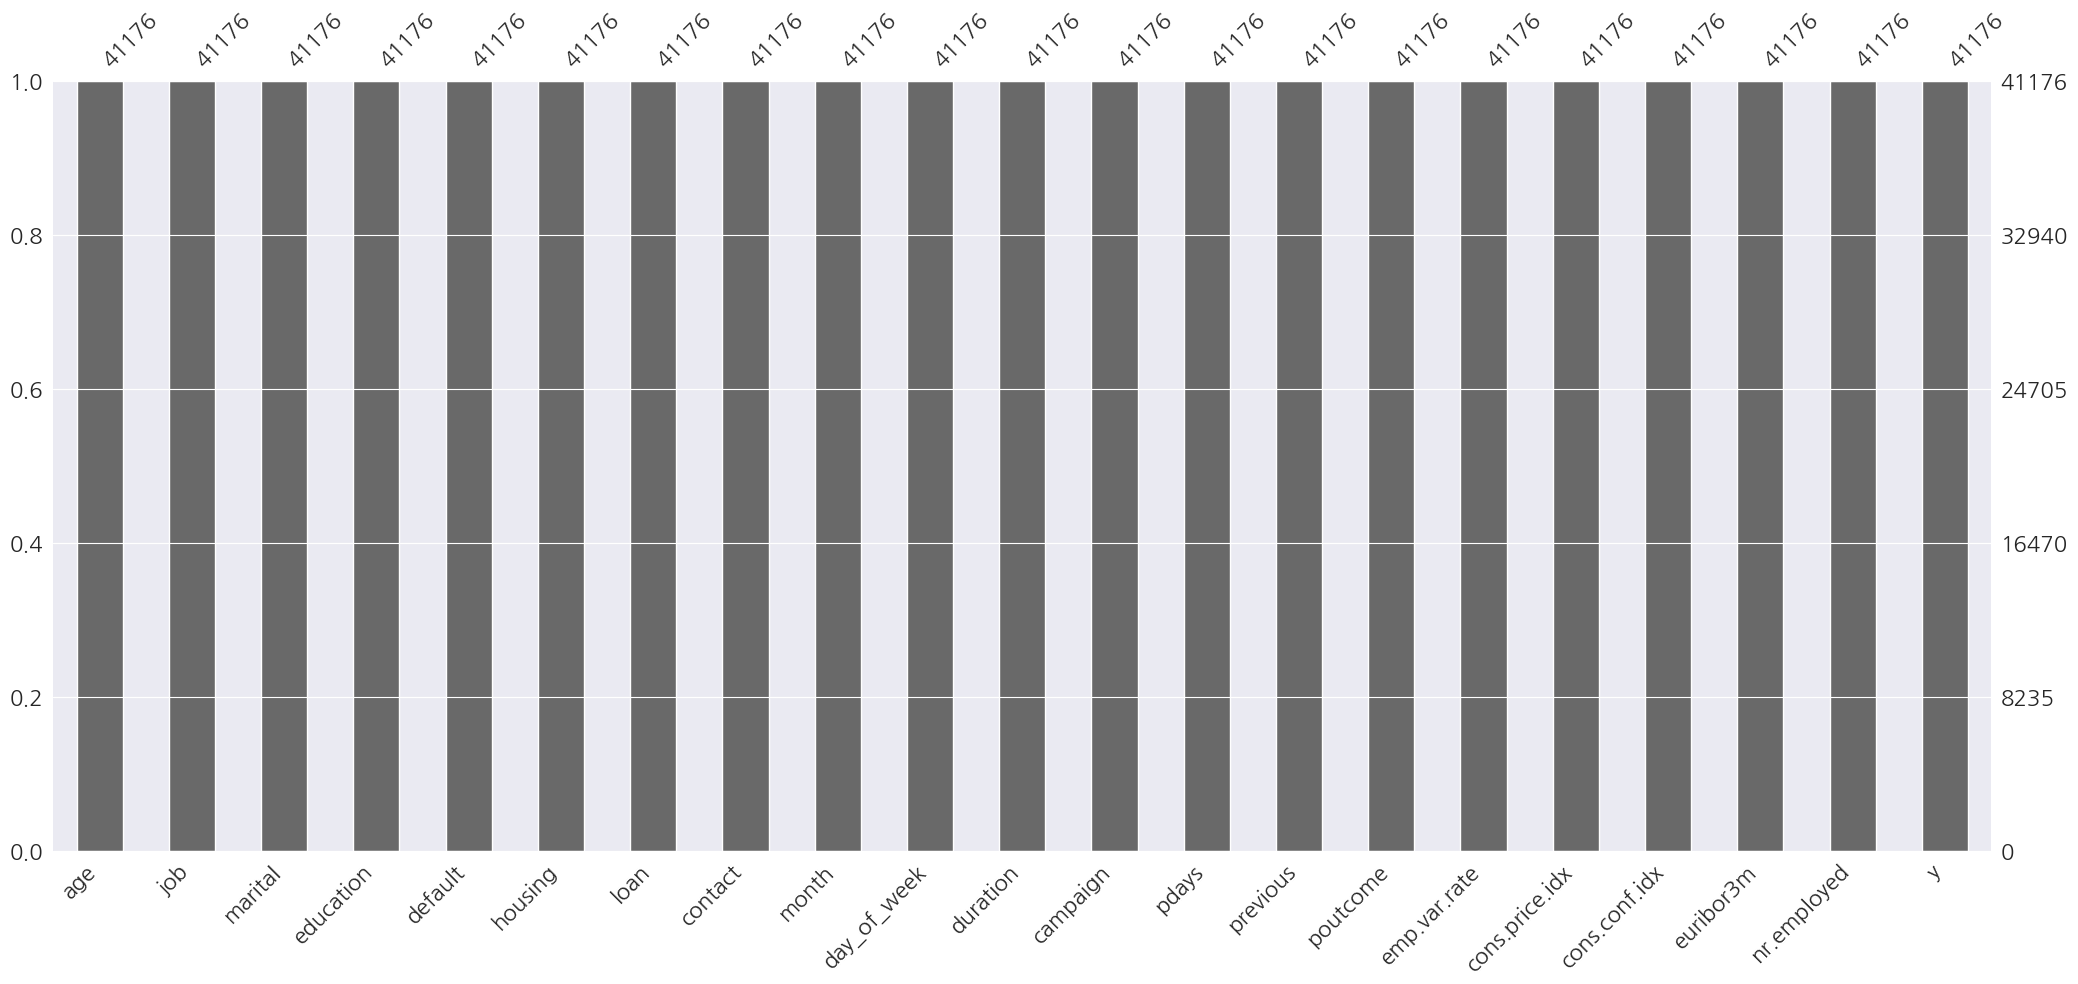

In [8]:
msno.bar(df)

# Ïù¥ÏÉÅÏπò ÌôïÏù∏

### Age
- 20~40ÎåÄÏóê Î™∞Î†§ÏûàÍ≥† 70ÏÇ¥Î∂ÄÌÑ∞ Ïù¥ÏÉÅÏπòÏûÑ
- Í∑ºÎç∞ 70Ïù¥ Ïù¥ÏÉÅÏπòÎùºÍ≥† ÏÉùÍ∞Å Ïïà ÌïòÎäîÎç∞
- 98ÏÑ∏ÍπåÏßÄ ÏûàÏùå. Ï∂©Î∂ÑÌûà ÏÇ¥ÏïÑÏÑú Ï†ÑÌôîÎ∞õÏùÑÎßåÌï®. -> Îçî ÏûêÏÑ∏Ìûà Î≥¥Î†§Î©¥ ÏßÅÏóÖÏùÑ ÌôïÏù∏Ìï¥Î¥êÏïºÌï†ÎìØ?
- 98ÏÑ∏Ïóê Î∏îÎ£®ÏπºÎùº ÏßÅÏ¢ÖÏù¥Î©¥ Ïùå Í≥ß Í∞àÍ±∞Í∞ôÏúºÎãàÍπê -> 80ÏÑ∏Ïóê Î∏îÎ£®ÏπºÎùº ÌïúÎ™ÖÏûáÏùå. -> Î≠ê Ïù¥ÏÉÅÌïú Îç∞Ïù¥ÌÑ∞ÎäîÏïÑÎãå Í±∞ Í∞ôÏùå


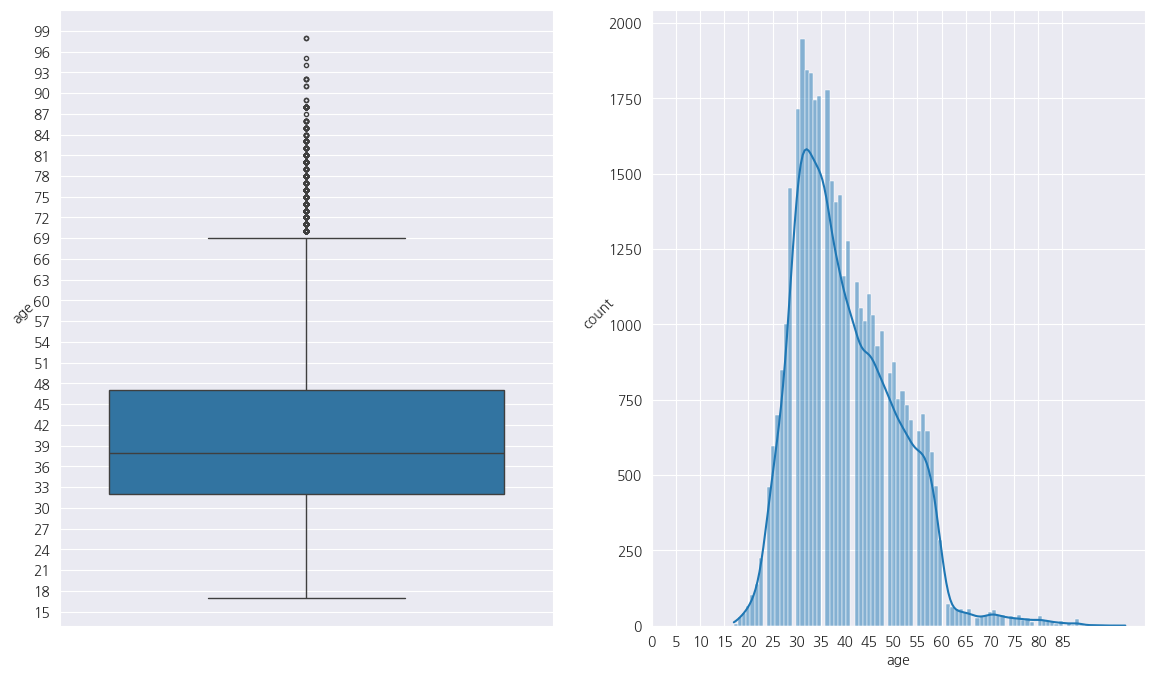

In [9]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
sns.boxplot(data = df, y = 'age',flierprops=dict(marker='o', markersize=3))
plt.yticks(np.arange(15,100,3))
plt.ylabel('age',rotation = 45)

plt.subplot(1,2,2)
sns.histplot(data = df, x = 'age',kde=True)
plt.ylabel("count",rotation=45)
plt.xticks(np.arange(0, 90, 5))


plt.show()

In [10]:
df['age'].value_counts()
df[df['age'] >= 80]['job'].value_counts()

job
retired        133
housemaid       13
unknown          2
management       1
blue-collar      1
Name: count, dtype: int64

In [11]:
df[(df['age'] >= 80) & (df['job'] =='blue-collar')]

age          job  marital    education default housing loan   contact  \
30079   80  blue-collar  married  high.school      no      no   no  cellular   

      month day_of_week  ...  campaign  pdays  previous  poutcome  \
30079   apr         fri  ...         6    999         3   failure   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
30079         -1.8          93.075          -47.1        1.4       5099.1  no  

[1 rows x 21 columns]

## Duration (ÎßàÏßÄÎßâ Ïó∞ÎùΩ ÏãúÍ∞Ñ)
- Îã®ÏúÑ: sec
- 1544Í∞ú Îã§Î•∏ Ï¥à ÏûàÏúºÎãàÍπê ÌûàÏä§Ìä∏Î°ú
- Ï†ÑÌôîÎ•º ÌïòÍ∏∞Ï†ÑÏóê Ïù¥ÏÇ¨ÎûåÏù¥ Í∞ÄÏûÖÌï†ÏßÄ ÏïàÌï†ÏßÄ ÏïåÏïÑÏïºÌï®. Î™®Îç∏ÎßÅÌï†Îïå ÎπºÍ≥† Ìï¥ÏïºÌï†ÎìØ
- ÏÉÅÏãùÏ†ÅÏúºÎ°ú Ï†ÑÌôîÎ•º Í∏∏Í≤åÌïòÎ©¥ Í∞ÄÏûÖÌïòÎäîÎü¨Í∞Ä„Öó„ÖÖÏÉùÍ∞Å
- **ÏßÄÏÜç ÏãúÍ∞Ñ: ÎßàÏßÄÎßâ Ï†ëÏ¥â ÏßÄÏÜç ÏãúÍ∞Ñ(Ï¥à Îã®ÏúÑ). Ï§ëÏöîÌïú Ï†ê: Ïù¥ ÏÜçÏÑ±ÏùÄ Ï∂úÎ†• Î™©ÌëúÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ©ÎãàÎã§(Ïòà: ÏßÄÏÜç ÏãúÍ∞Ñ=0Ïù¥Î©¥ y="ÏïÑÎãàÏò§"). Í∑∏Îü¨ÎÇò ÌÜµÌôîÍ∞Ä ÏàòÌñâÎêòÍ∏∞ Ï†ÑÏóêÎäî ÏßÄÏÜç ÏãúÍ∞ÑÏùÑ Ïïå Ïàò ÏóÜÏäµÎãàÎã§. ÎòêÌïú ÌÜµÌôîÍ∞Ä ÎÅùÎÇú ÌõÑÏóêÎäî yÍ∞Ä Î™ÖÌôïÌïòÍ≤å ÏïåÎ†§Ï†∏ ÏûàÏäµÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ ÏûÖÎ†•ÏùÄ Î≤§ÏπòÎßàÌÅ¨ Î™©Ï†ÅÏúºÎ°úÎßå Ìè¨Ìï®ÎêòÏñ¥Ïïº ÌïòÎ©∞ ÌòÑÏã§Ï†ÅÏù∏ ÏòàÏ∏° Î™®Îç∏ÏùÑ ÏùòÎèÑÌïòÎäî Í≤ΩÏö∞ ÌèêÍ∏∞Ìï¥Ïïº Ìï©ÎãàÎã§.**
- Ïñ¥Ï∞®Ìîº Î™®Îç∏ÎßÅÏóê ÏïàÏì∏Í±∞ÎãàÍπê Ï†ÑÏ≤òÎ¶¨ Ïïà Ìï®.

In [12]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860      1.734437     72.251364  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

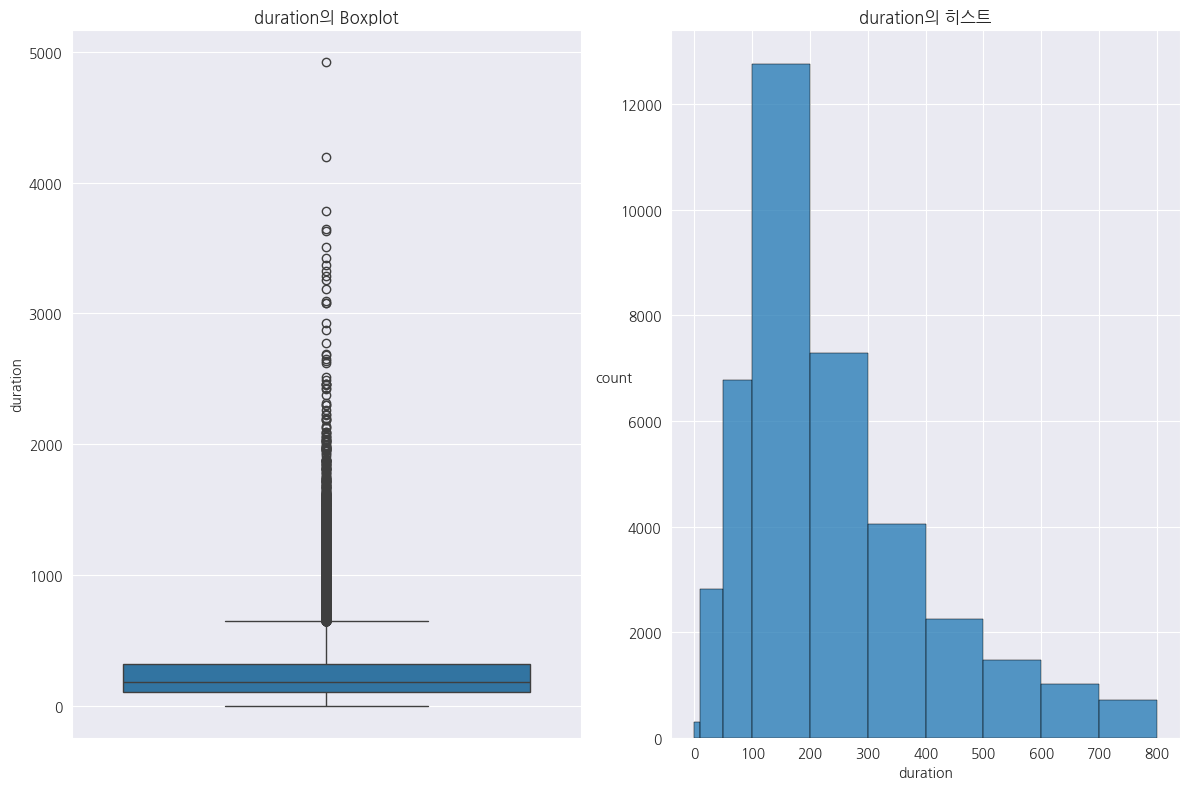

In [13]:
plt.figure(figsize = (12, 8))

plt.subplot(1,2,1)
plt.title("durationÏùò Boxplot")
sns.boxplot(data = df, y = 'duration')


plt.subplot(1,2,2)
plt.title("durationÏùò ÌûàÏä§Ìä∏")
# data ÎàÑÏàò, ÎèÖÎ¶ΩÎ≥ÄÏàò ÌïòÎÇòÍ∞Ä Ï¢ÖÏÜçÎ≥ÄÏàòÏóê ÎÑàÎ¨¥ ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπò„Ö£„Ñ¥Îäê „Ñ¥Í±∞
# df['duration_bins'] = pd.cut(df['duration'], bins=10)
duration_bins = [0,10,50,100,200,300,400,500,600, 700, 800]
sns.histplot(data = df, x = 'duration', bins=duration_bins, edgecolor='black')
plt.ylabel("count",rotation = 0)

plt.tight_layout()
plt.show()

## Campaign Ï≤òÎ¶¨ - Ï∫†ÌéòÏù∏ ÎèôÏïà Ïó∞ÎùΩ ÌöüÏàò (Ïà´Ïûê)
- ÌèâÍ∑† 2.5, Ï§ëÏïô 2.0, ÌëúÌé∏ 2.7Ïù∏Îç∞ Îß•Ïä§Í∞Ä 56  -> Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ÌïòÍ∏∞
- Î∞ïÏä§ ÌîåÎ°ØÏúºÎ°ú 7Ïù¥ÏÉÅÏùÄ Ïù¥ÏÉÅÏπòÏûÑ -> 2400Í∞ú Ï†ïÎèÑ ÏßÄÏõåÏïºÎêòÎÇò
- 15Î≤à Ïù¥ÏÉÅÏù¥ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò 1ÌçºÏÑºÌä∏ÏûÑ. Ïù¥Ï†ïÎèÑÎäî ÏóÜÏï†ÎèÑ Îê† Í±∞ Í∞ôÏùå
-
- ÏÉÅÏãùÏ†ÅÏúºÎ°ú ÏïÑÏßÅ Í∞ÄÏûÖ ÏïàÌñàÏùÑÎïå Ï†ÑÌôîÎ•º Í±∫ -> Ï†ÑÌôî ÏàòÍ∞Ä ÎÜíÏúºÎ©¥ 'ÏïÑÏßÅ' Î≥¥Ìóò Í∞ÄÏûÖ Ïïà ÌñàÎã§. -> Í∑ºÎç∞ Í∞ÄÏûÖ Í≤∞Í≥ºÎãàÍπê Ï†ÑÌôîÏàòÍ∞Ä ÎÜíÏúºÎ©¥ Í∞ÄÏûÖÏú®Ïù¥ ÎÜíÎÇò
- Ï†ÑÌôîÌï¥ÎèÑ Î≥¥Ìóò Í∞ÄÏûÖ Ïïà Ìï† ÌôïÎ•†Ïù¥ ÎÜíÏùå or Ï†ÑÌôî ÎßéÏù¥ Ìï¥ÏÑú Ïú†Ìòπ ÎÅùÏóê Í∞ÄÏûÖ Ìïú ÏÇ¨ÎûåÎèÑ ÏûàÏùÑ Í≤É -> ÏïÑÎãà Í∑ºÎç∞ Î≥¥ÌóòÏùÑ Ïú†ÌòπÌïúÎã§Í≥† Í∞ÄÏûÖÌïòÎÇò
- Î≠êÍ∞Ä Îçî ÎÜíÏúºÎ†§ÎÇò
### ÌôïÏù∏Ìï¥Î≥¥ÎãàÍπê CampaignÏù¥ ÎÜíÏùÑ ÏàòÎ°ù yesÍ∞Ä ÎÇÆÏïÑÏßê. ÏïÑÎ¨¥Î¶¨ Ï†ÑÌôîÌï¥ÎèÑ Í∞ÄÏûÖ Ïïà ÌïòÎäî ÎìØ

In [14]:
df['campaign'].value_counts()

campaign
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [99]:
# len(df[df['campaign'] >=15]) # 15Ïù¥ÏÉÅÏùÄ ÏßÄÏö∞Ïûê
# ÏúàÏ†ÄÎùºÏù¥Ïßï, Ïù¥Îü∞ Í≤ÉÎèÑ ÏûàÎî∞....


# üîé ÏòàÏãú
# 	‚Ä¢	Îç∞Ïù¥ÌÑ∞: [1, 2, 3, 4, 5, 100]
# 	‚Ä¢	Ïó¨Í∏∞ÏÑú 100ÏùÄ ÎÑàÎ¨¥ ÌÅ∞ Ïù¥ÏÉÅÏπòÎùºÍ≥† ÌïòÏûê.
#
# üëâ ÏúàÏ†ÄÎùºÏù¥Ïßï (ÏÉÅ¬∑ÌïòÏúÑ 5% Ï†àÎã®) Ï†ÅÏö©:
# 	‚Ä¢	ÏÉÅÏúÑ 5%Î•º ÏûòÎùºÏÑú Í≤ΩÍ≥ÑÍ∞íÏúºÎ°ú ÏπòÌôò ‚Üí 100 ‚Üí 5 Î°ú Î≥ÄÌôò.
# 	‚Ä¢	Í≤∞Í≥º: [1, 2, 3, 4, 5, 5]



df = df.drop(df[df['campaign'] >= 15].index, axis = 0)

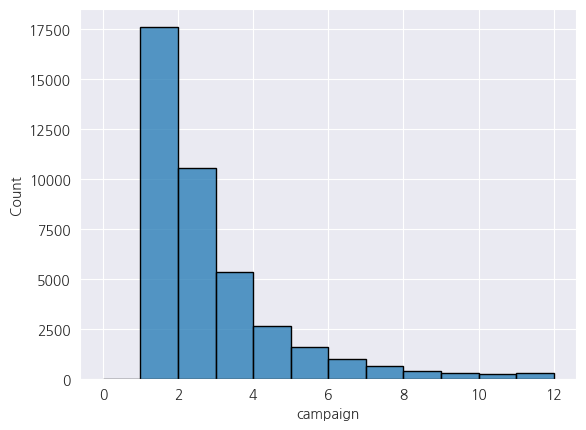

In [16]:
campaign_bins = [0,1,2,3,4,5,6,7,8,9,10,11,12] # 0Ïù¥ ÏóÜÎÑ§
sns.histplot(data = df, x = 'campaign',  bins=campaign_bins,edgecolor='black')
plt.show()


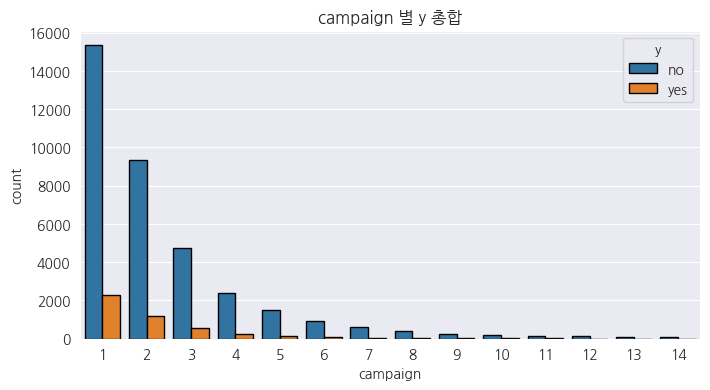

In [17]:
counts = (
    df.groupby('campaign')['y'].value_counts().rename("count").reset_index()
)

plt.figure(figsize = (8, 4))
plt.title("campaign Î≥Ñ y Ï¥ùÌï©")
sns.barplot(data = counts, x='campaign', y='count', hue='y',edgecolor='black')
plt.show()

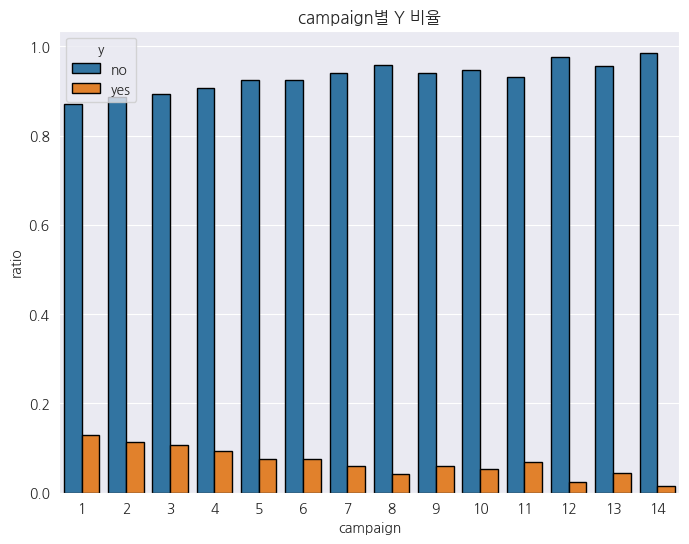

In [18]:
counts = (
    df.groupby('campaign')['y'].value_counts(normalize=True).rename("ratio").reset_index()
)

plt.figure(figsize = (8, 6))
plt.title("campaignÎ≥Ñ Y ÎπÑÏú®")
sns.barplot(data = counts, x='campaign', y='ratio', hue='y', edgecolor='black')
plt.show()

## poutcome	Ïù¥Ï†Ñ Ï∫†ÌéòÏù∏Ïùò Í≤∞Í≥º (Î≤îÏ£ºÌòï)
- ÏóÜÏùå -> Ï†ÄÎ≤à Ï∫†ÌéòÏù∏Ïóê Í≤∞Í≥ºÍ∞Ä ÏóÜÏúºÎ©¥ Ïïà Í±¥ Í±¥Í∞Ä Îç∞Ïù¥ÌÑ∞Í∞Ä ÎàÑÎùΩÏù∏Í±¥Í∞Ä -> Ïù¥Ï†Ñ Ï∫†ÌéòÏù∏ÏóêÏÑú ÏïàÍ±∏ÏóàÎî∞Î©¥ previousÍ∞Ä ÏóÜÏñ¥ÏïºÎê® -> ÏóÜÏùå -> ÎàÑÎùΩ ÏïÑÎãò
- Ïã§Ìå®
- ÏÑ±Í≥µ -> ÏÑ±Í≥µÏù∏Îç∞ Îòê Í±∏Ïñ¥? -> Îã§Î•∏ ÏÉÅÌíà Ï∂îÏ≤úÌïòÎ†§Í≥† Í±∏ÏóàÎÇò

### Ï†ÄÎ≤àÏóê ÏÑ±Í≥µÌñàÏúºÎ©¥ Ïù¥Î≤àÏóêÎèÑ ÏÑ±Í≥µÌïú Í≤ΩÏö∞Í∞Ä ÎßéÏùå

In [19]:
df['poutcome'].value_counts()
df[(df['poutcome'] == "nonexistent") & (df['previous'] >= 1)]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]

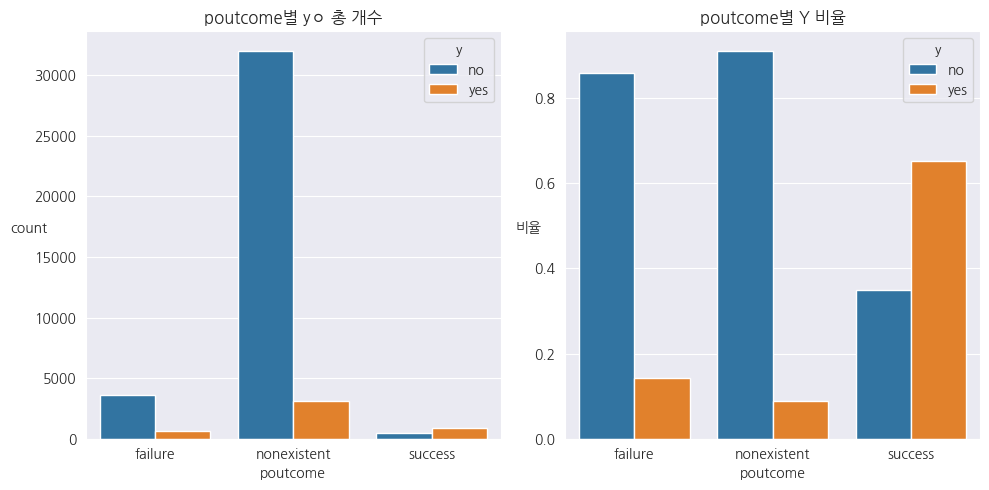

poutcome    y     ratio
0      failure   no  0.857647
1      failure  yes  0.142353
2  nonexistent   no  0.910860
3  nonexistent  yes  0.089140
4      success  yes  0.651129
5      success   no  0.348871

In [20]:
plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
counts = (
    df.groupby('poutcome')['y'].value_counts().rename("count").reset_index()
)
plt.title("poutcomeÎ≥Ñ y„Öá Ï¥ù Í∞úÏàò")
plt.ylabel("count",rotation = 0)
sns.barplot(data=counts, x="poutcome", y="count", hue="y")


plt.subplot(1,2,2)
counts = (
    df.groupby("poutcome")["y"]
      .value_counts(normalize=True)
      .rename("ratio")
      .reset_index()
)

sns.barplot(data=counts, x="poutcome", y="ratio", hue="y")
plt.title("poutcomeÎ≥Ñ Y ÎπÑÏú®")
plt.ylabel("ÎπÑÏú®", rotation = 0)
plt.tight_layout()
plt.show()
counts

In [21]:
df = pd.get_dummies(df, columns=['poutcome'], prefix=['poutcome'])

## previous Ïù¥Ï†Ñ Ï∫†ÌéòÏù∏ ÎèôÏïà Ïó∞ÎùΩ ÌöüÏàò (Ïà´Ïûê)
- Ïù¥Ï†Ñ: Ïù¥ Ï∫†ÌéòÏù∏ Ïù¥Ï†ÑÏóê ÏàòÌñâÎêú Ïó∞ÎùΩÏ≤ò ÏàòÏôÄ Ïù¥ Í≥†Í∞ù(numeric)
- 0~7Î≤à ÏûàÏùå.
- 1Î∂ÄÌÑ∞ Ïù¥ÏÉÅÏπòÎÑ§ -> Í∑ºÎç∞ Î≠ê Îã§ Í∞ÄÎä•Ìïú ÏàòÏπúÎç∞
- Í∑ºÎç∞ Ïù¥Î≤à Ï∫†ÌéòÏù∏ÏóêÎäî ÌèâÍ∑†Ïù¥ 2Î≤àÏù∏Îç∞... ÏùºÎ∂ÄÎü¨ Ïã†Í∑ú Í≥†Í∞ùÏóêÍ≤åÎßå Ïó∞ÎùΩÌïúÍ±¥Í∞Ä? Ï∫†ÌéòÏù∏ ÏãúÏûëÌïúÏßÄ ÏñºÎßà ÏïàÎêúÍ±¥Í∞Ä, ÎÇòÏ§ëÏóê monthÎèÑ Î¥êÏïºÎê†ÎìØ
- 0Î≤àÏù¥ Ï†úÏùº ÎßéÏùÄÎç∞ Í∑∏Îüº Ïù¥Î≤à Ï∫†ÌéòÏù∏Ïóê Ï≤òÏùåÏúºÎ°ú Î∞õÏùÄ ÏÇ¨ÎûåÏù¥ ÎåÄÎ∂ÄÎ∂ÑÏûÑ -> Í∑∏Îüº Ïã†Í∑úÌïúÌÖåÎßå ÌïúÍ≤å ÎßûÎäîÎìØ? ÏïÑÎãàÎ©¥ Íµ¨ÏßàÍµ¨ÏßàÌïòÍ≤å Ïó∞ÎùΩÌïúÎìØ
### Ï†ÑÏóê Ï†ÑÌôîÎ•º Ï¢Ä Í±∏ÏóàÏúºÎ©¥ ÏÑ±Í≥µ ÌôïÎ•≠Ïù¥ ÎÜíÏùå

In [22]:
df['previous'].value_counts()

previous
0    35147
1     4559
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

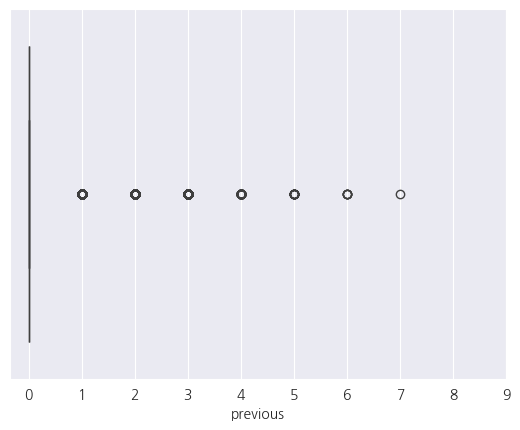

In [23]:
sns.boxplot(data = df, x = 'previous')
plt.xticks(np.arange(0, 10, 1))
plt.show()

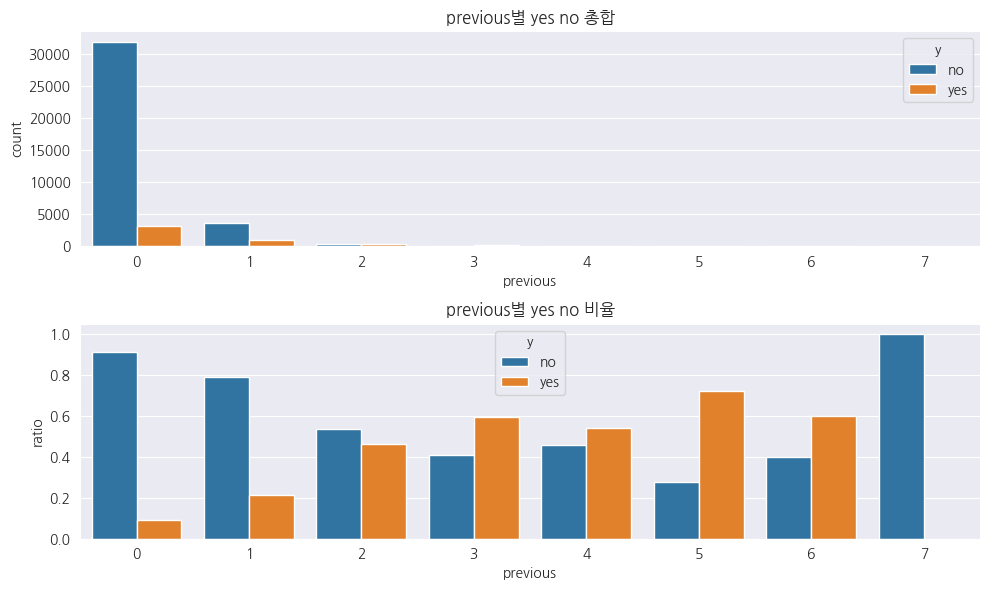

In [24]:
plt.figure(figsize = (10, 6))

plt.subplot(2,1,1)
counts = (
    df.groupby('previous')["y"].value_counts().rename("count").reset_index()
)
plt.title("previousÎ≥Ñ yes no Ï¥ùÌï©")
sns.barplot(data=counts, x='previous', y="count",hue='y')
# ÎÇòÎ®∏ÏßÄÍ∞Ä ÏûëÏïÑÏÑú Ïïà Î≥¥Ïù¥ÎÑ§

plt.subplot(2,1,2)
counts = (
    df.groupby('previous')["y"].value_counts(normalize=True).rename("ratio").reset_index()
)
plt.title("previousÎ≥Ñ yes no ÎπÑÏú®")
sns.barplot(data=counts, x='previous', y="ratio",hue='y')

plt.tight_layout()
plt.show()

## pdays Ïù¥Ï†Ñ Ï∫†ÌéòÏù∏ ÌõÑ ÏßÄÎÇú ÏùºÏàò (Ïà´Ïûê)
- **pdays: Ïù¥Ï†Ñ Ï∫†ÌéòÏù∏ÏóêÏÑú ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ÏóêÍ≤å ÎßàÏßÄÎßâÏúºÎ°ú Ïó∞ÎùΩÌïú ÌõÑ Í≤ΩÍ≥ºÌïú ÏùºÏàò(numeric; 999Îäî ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ÏóêÍ≤å Ïù¥Ï†ÑÏóê Ïó∞ÎùΩÌïòÏßÄ ÏïäÏïòÏùåÏùÑ ÏùòÎØ∏Ìï®)**

In [25]:
df['pdays'].value_counts()

pdays
999    39255
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [26]:
# df['pdays'] = df['pdays'].replace(999, np.nan)
# df

## ÎÇ†ÏßúÎ≥ÑÎ°ú Î≥¥Í∏∞.
- Í∑∏Îüº Ïù¥Í≤ÉÎèÑ shuffle = falseÎ°ú Ìï¥ÏïºÎêòÎÇò.. 12ÏõîÍ∫ºÎ≥¥Í≥† 11Ïõî ÏòàÏ∏°ÌïòÎ©¥ ÏïàÎêòÎãàÍπê?
- Î≥¥Ìóò Í∞ÄÏûÖÏù¥ ÏõîÎ≥ÑÎ°ú Îã§Î•∏Í∞Ä? -> ÏõîÎ≥ÑÎ°úÎäî Îî±Ìûà Î≠ê ÏóÜÎäî Í±∞ Í∞ôÏùå
 - Í∑∏Îüº Í≥†Í∞ù ÌäπÏÑ±Îßå ÏòÅÌñ•ÏûàÎäîÍ±∞ ÏïÑÎãåÍ∞Ä
- ÏïÑ Í∑ºÎç∞ Í≤ΩÏ†ú ÏßÄÌëúÎäî Í≥ºÍ±∞ ÏòÅÌñ•ÎèÑ ÏûàÏúºÎãàÍπê Ìï¥ÏïºÎê†ÎìØ?
- ÏïÑ Í∑∏ÎûòÌîÑ „ÖÇ„ÑπÎç∞ Î≠êÍ∞Ä ÎÇ´ÏßÄ

In [27]:
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
             'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df['month'] = df['month'].map(month_map)

df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

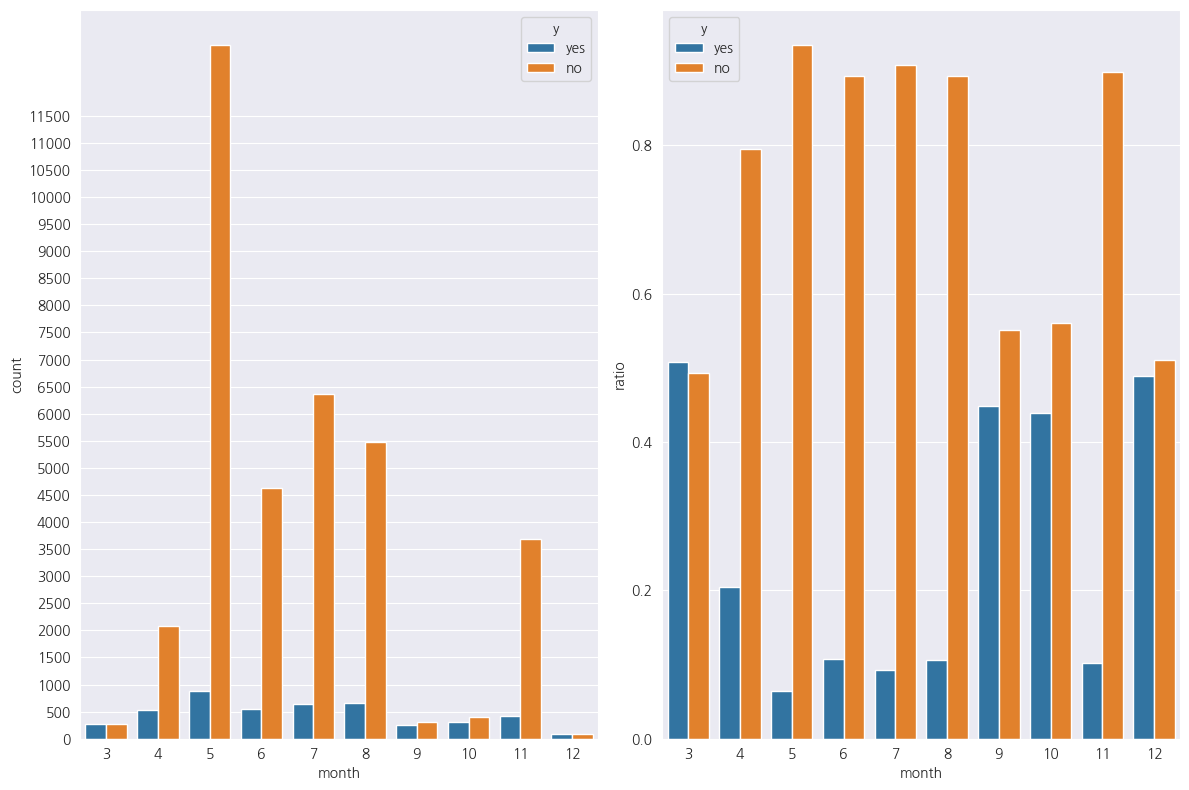

In [28]:


plt.figure(figsize = (12, 8))

plt.subplot(1,2,1)
counts = (
    df.groupby('month')['y'].value_counts().rename("count").reset_index()
)
sns.barplot(data=counts, x='month', y='count', hue='y')
plt.yticks(np.arange(0, 12000, 500))

plt.subplot(1,2,2)
counts = (
    df.groupby('month')['y'].value_counts(normalize=True).rename("ratio").reset_index()
)
sns.barplot(data=counts, x='month', y='ratio', hue='y')



plt.tight_layout()
plt.show()

In [29]:
for i in range(3,13):
    print(f"{i}ÏõîÏùò yes = ", len(df[(df['month'] == i) & (df['y'] == "yes")]))
    print(f"{i}ÏõîÏùò no = ", len(df[(df['month'] == i) & (df['y'] == "no")]),"\n")

# Îî±Ìûà ÏõîÎ≥ÑÎ°ú Îã§Î•∏ Í≤É Í∞ôÏßÄÏïäÏùå.
# y/n ÎπÑÏú®Ïù¥ ÎπÑÎì±ÎπÑÎì±Ìïú Í≥≥ÏùÄ ÌëúÎ≥∏Ïù¥ Ï†ÅÏñ¥ÏÑú Í∑∏Î†áÍ≤å ÎÇòÏò® Í±∞ Í∞ôÍ≥†
# y/n countÍ∞Ä ÎÜíÏùÄ Í≤ÉÎèÑ Îã®ÏàúÌûà Ïó∞ÎùΩÌïú ÏÇ¨ÎûåÏù¥ ÎßéÏïÑÏÑú yesÍ∞Ä Í∑∏ÎÇòÎßà ÎÜíÏùÄÎç∞ Ïó∞ÎùΩÌïú Í≤ÉÏóê ÎπÑÌï¥ÏÑú ÎÜíÏùÄ Í±¥ ÏïÑÎãàÍ≥†... ÎπÑÌö®Ïú®Ï†ÅÏù¥ÎùºÍ≥† Î¥Ñ.

3ÏõîÏùò yes =  276
3ÏõîÏùò no =  268 

4ÏõîÏùò yes =  538
4ÏõîÏùò no =  2090 

5ÏõîÏùò yes =  884
5ÏõîÏùò no =  12813 

6ÏõîÏùò yes =  557
6ÏõîÏùò no =  4633 

7ÏõîÏùò yes =  646
7ÏõîÏùò no =  6359 

8ÏõîÏùò yes =  655
8ÏõîÏùò no =  5482 

9ÏõîÏùò yes =  256
9ÏõîÏùò no =  314 

10ÏõîÏùò yes =  315
10ÏõîÏùò no =  402 

11ÏõîÏùò yes =  416
11ÏõîÏùò no =  3684 

12ÏõîÏùò yes =  89
12ÏõîÏùò no =  93 



### ÏöîÏùºÎ≥ÑÎ°ú Î≥¥Í∏∞
- Î≥Ñ Ï∞®Ïù¥ ÏóÜÎäî ÎìØ

<Axes: xlabel='day_of_week', ylabel='count'>

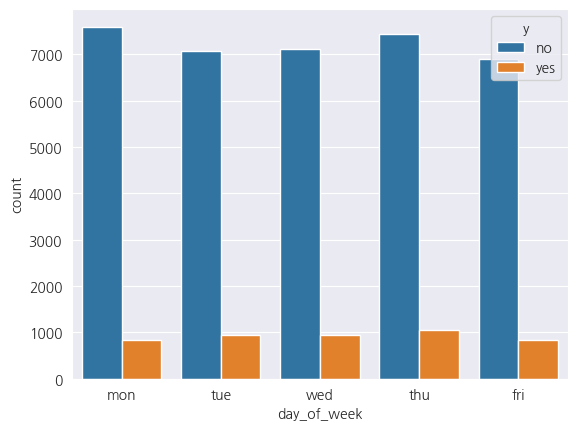

In [30]:
df['day_of_week'].unique()
sns.countplot(data = df, x='day_of_week', hue='y')

In [31]:
day_map = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
df['day'] = df['day_of_week'].map(day_map)

df['day_sin'] = np.sin(2 * np.pi * df['day']/5)
df['day_cos'] = np.cos(2 * np.pi * df['day']/5)

## job column Î≥¥Í∏∞
- Í∑∏ÎÉ•

In [32]:
df['job'].value_counts()
df = pd.get_dummies(df, columns=['job'])

In [33]:
df

age  marital            education  default housing loan    contact  \
0       56  married             basic.4y       no      no   no  telephone   
1       57  married          high.school  unknown      no   no  telephone   
2       37  married          high.school       no     yes   no  telephone   
3       40  married             basic.6y       no      no   no  telephone   
4       56  married          high.school       no      no  yes  telephone   
...    ...      ...                  ...      ...     ...  ...        ...   
41183   73  married  professional.course       no     yes   no   cellular   
41184   46  married  professional.course       no      no   no   cellular   
41185   56  married    university.degree       no     yes   no   cellular   
41186   44  married  professional.course       no      no   no   cellular   
41187   74  married  professional.course       no     yes   no   cellular   

       month day_of_week  duration  ...  job_entrepreneur  job_housemaid  \
0          5         mon       261  ...             False           True   
1          5         mon       149  ...             False          False   
2          5         mon       226  ...             False          False   
3          5         mon       151  ...             False          False   
4          5         mon       307  ...             False          False   
...      ...         ...       ...  ...               ...            ...   
41183     11         fri       334  ...             False          False   
41184     11         fri       383  ...             False          False   
41185     11         fri       189  ...             False          False   
41186     11         fri       442  ...             False          False   
41187     11         fri       239  ...             False          False   

       job_management  job_retired  job_self-employed  job_services  \
0               False        False              False         False   
1               False        False              False          True   
2               False        False              False          True   
3               False        False              False         False   
4               False        False              False          True   
...               ...          ...                ...           ...   
41183           False         True              False         False   
41184           False        False              False         False   
41185           False         True              False         False   
41186           False        False              False         False   
41187           False         True              False         False   

       job_student  job_technician job_unemployed  job_unknown  
0            False           False          False        False  
1            False           False          False        False  
2            False           False          False        False  
3            False           False          False        False  
4            False           False          False        False  
...            ...             ...            ...          ...  
41183        False           False          False        False  
41184        False           False          False        False  
41185        False           False          False        False  
41186        False            True          False        False  
41187        False           False          False        False  

[40770 rows x 39 columns]

## martial Ïª¨Îüº Î≥¥Í∏∞
- unknown 78Í∞úÏù∏Îç∞ ÎÇòÎ®∏ÏßÄ Ïª¨ÎüºÏóê Î¨∏Ï†úÎäî ÏóÜÍ∏¥ÌïúÎç∞.. ÏóÜÏï®Íπå. ÎåÄÏ≤¥Ìï†Íπå ÎÉÖÎëòÍπå......
- ÏïÑ Í∑ºÎç∞ Ïùå...ÏÇ≠Ï†úÌïòÍ≥†Ïã∂Ïùå ÍπîÎÅîÌïòÍ≤å
- ÎØ∏Ìòº, Í≤∞Ìòº, Ïù¥Ìòº ÎßêÍ≥† Îòê Î≠êÏûàÏßÄ?... Í≤åÏù¥Î†àÏ¶à Î∂àÎ≤ïÎèôÍ±∞? Í∑∏ÎûòÎèÑ ÎØ∏ÌòºÏïÑÎãåÍ∞Ä

In [34]:
df['marital'].value_counts()

marital
married     24673
single      11456
divorced     4563
unknown        78
Name: count, dtype: int64

In [35]:
df = df.drop(df[df['marital'] == "unknown"].index, axis=0)
df = pd.get_dummies(df, columns=['marital'], prefix='marital')

## education column ÌôïÏù∏
- Î¨∏ÎßπÏù¥ 18Î™ÖÏûÑ. ÏñòÎÑ§Îäî Î≥¥Ìóò Í∞ÄÏûÖÌïòÎ©¥ ÎßùÌï†Í±∞ Í∞ôÏùÄÎç∞ ÏùºÎã® Î¨∏ÎßπÎèÑ Í∞ÄÏûÖÏùÑ ÌïòÍ∏¥ Ìï®. 3Î™ÖÏûÑ. Ìò∏Í∞±ÎãπÌïúÍ±¥Í∞Ä...
- Î¨∏Îßπ ÏÇ¨Î¨¥ÏßÅÏóê + ÏÇ¨ÏóÖÍ∞ÄÎèÑ ÏûàÎäîÎç∞ Í∞ÄÎä•ÌïúÍ∞Ä... ÎÑàÎ¨¥ Ï†ÄÌïôÎ†•ÏûêÎ•º Î¨¥ÏãúÌïòÎäîÍ±¥Í∞Ä..
- Í∑∏ÎÉ• Î¨∏ÎßπÏùÄ ÏÇ≠Ï†úÌïòÍ≥† ÎÇòÎ®∏ÏßÄÎäî Ïù∏ÏΩîÎî©ÌïòÍ∏∞

In [36]:
df['education'].value_counts()

education
university.degree      12021
high.school             9405
basic.9y                5978
professional.course     5187
basic.4y                4113
basic.6y                2266
unknown                 1704
illiterate                18
Name: count, dtype: int64

In [37]:
df = df.drop(df[df['education'] == "illiterate"].index, axis = 0)

In [38]:
df = pd.get_dummies(df, columns=['education'], prefix='edu')

## housing, loan, defualt, contact Î≥ÄÌôò

In [39]:
df['housing'].value_counts()

housing
yes        21332
no         18361
unknown      981
Name: count, dtype: int64

In [40]:
df['loan'].value_counts()

loan
no         33522
yes         6171
unknown      981
Name: count, dtype: int64

In [41]:
df['default'].value_counts() # yesÍ∞Ä 3Í∞ú
# df[df['default'] == "yes"]
df = df.drop(df[df['default'] == 'yes'].index, axis=0)

In [42]:
df = pd.get_dummies(df, columns=['housing','loan','default'], prefix=['housing','loan','default'])

In [43]:
df = pd.get_dummies(df, columns=['contact'], prefix=['contact'])

# Î™®Îç∏ÎßÅ

In [44]:
df['y'] = df['y'].map({'yes':1, 'no':0})
df

age  month day_of_week  duration  campaign  pdays  previous  \
0       56      5         mon       261         1    999         0   
1       57      5         mon       149         1    999         0   
2       37      5         mon       226         1    999         0   
3       40      5         mon       151         1    999         0   
4       56      5         mon       307         1    999         0   
...    ...    ...         ...       ...       ...    ...       ...   
41183   73     11         fri       334         1    999         0   
41184   46     11         fri       383         1    999         0   
41185   56     11         fri       189         2    999         0   
41186   44     11         fri       442         1    999         0   
41187   74     11         fri       239         3    999         1   

       emp.var.rate  cons.price.idx  cons.conf.idx  ...  housing_no  \
0               1.1          93.994          -36.4  ...        True   
1               1.1          93.994          -36.4  ...        True   
2               1.1          93.994          -36.4  ...       False   
3               1.1          93.994          -36.4  ...        True   
4               1.1          93.994          -36.4  ...        True   
...             ...             ...            ...  ...         ...   
41183          -1.1          94.767          -50.8  ...       False   
41184          -1.1          94.767          -50.8  ...        True   
41185          -1.1          94.767          -50.8  ...       False   
41186          -1.1          94.767          -50.8  ...        True   
41187          -1.1          94.767          -50.8  ...       False   

       housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  \
0                False        False     True         False     False   
1                False        False     True         False     False   
2                False         True     True         False     False   
3                False        False     True         False     False   
4                False        False    False         False      True   
...                ...          ...      ...           ...       ...   
41183            False         True     True         False     False   
41184            False        False     True         False     False   
41185            False         True     True         False     False   
41186            False        False     True         False     False   
41187            False         True     True         False     False   

       default_no  default_unknown  contact_cellular  contact_telephone  
0            True            False             False               True  
1           False             True             False               True  
2            True            False             False               True  
3            True            False             False               True  
4            True            False             False               True  
...           ...              ...               ...                ...  
41183        True            False              True              False  
41184        True            False              True              False  
41185        True            False              True              False  
41186        True            False              True              False  
41187        True            False              True              False  

[40671 rows x 53 columns]

In [45]:
df['pdays'].value_counts()

pdays
999    39162
3        439
6        409
4        117
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        27
1         26
15        24
14        20
8         18
0         15
16        10
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40671 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      40671 non-null  int64  
 1   month                    40671 non-null  int64  
 2   day_of_week              40671 non-null  object 
 3   duration                 40671 non-null  int64  
 4   campaign                 40671 non-null  int64  
 5   pdays                    40671 non-null  int64  
 6   previous                 40671 non-null  int64  
 7   emp.var.rate             40671 non-null  float64
 8   cons.price.idx           40671 non-null  float64
 9   cons.conf.idx            40671 non-null  float64
 10  euribor3m                40671 non-null  float64
 11  nr.employed              40671 non-null  float64
 12  y                        40671 non-null  int64  
 13  poutcome_failure         40671 non-null  bool   
 14  poutcome_nonexistent     40

## ÎèÖÎ¶ΩÎ≥ÄÏàò Í±¥Ï†∏ÎÇ¥Í∏∞

In [47]:
X = df.drop(columns=['y', 'duration', 'day_of_week'])
y = df['y']

### Ïù¥Í±∞ ÏÖîÌîå Ïïà ÌïòÎ©¥ Í∑∏Îüº Ïò§Î¶ÑÏ∞®ÏàúÏúºÎ°ú Ï†ïÌï¥ÏïºÎêòÎäîÍ±∞ÏïÑÎãåÍ∞Ä. Îç∞Ïù¥ÌÑ∞Î•º

In [95]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,shuffle = False)

In [93]:
df = df.sort_values(by="month")
df

age  month day_of_week  duration  campaign  pdays  previous  \
27789   39      3         tue       395         3    999         0   
27775   32      3         mon        75         2    999         0   
27811   88      3         wed       323         1    999         0   
27788   38      3         tue        59         1    999         0   
27704   44      3         mon       239         1    999         0   
...    ...    ...         ...       ...       ...    ...       ...   
38981   46     12         fri       696        10    999         0   
39053   47     12         thu       155         1    999         1   
39081   27     12         tue       396         1    999         0   
38982   25     12         fri      1139         2      4         1   
27688   55     12         fri       136         1    999         0   

       emp.var.rate  cons.price.idx  cons.conf.idx  ...  housing_no  \
27789          -1.8          92.843          -50.0  ...       False   
27775          -1.8          92.843          -50.0  ...       False   
27811          -1.8          92.843          -50.0  ...        True   
27788          -1.8          92.843          -50.0  ...        True   
27704          -1.8          92.843          -50.0  ...        True   
...             ...             ...            ...  ...         ...   
38981          -3.0          92.713          -33.0  ...       False   
39053          -3.0          92.713          -33.0  ...       False   
39081          -3.0          92.713          -33.0  ...       False   
38982          -3.0          92.713          -33.0  ...        True   
27688          -0.2          92.756          -45.9  ...        True   

       housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  \
27789            False         True     True         False     False   
27775            False         True     True         False     False   
27811            False        False     True         False     False   
27788            False        False     True         False     False   
27704            False        False     True         False     False   
...                ...          ...      ...           ...       ...   
38981             True        False    False          True     False   
39053            False         True     True         False     False   
39081            False         True     True         False     False   
38982            False        False     True         False     False   
27688            False        False     True         False     False   

       default_no  default_unknown  contact_cellular  contact_telephone  
27789        True            False              True              False  
27775        True            False              True              False  
27811        True            False              True              False  
27788        True            False              True              False  
27704        True            False              True              False  
...           ...              ...               ...                ...  
38981        True            False              True              False  
39053        True            False              True              False  
39081        True            False              True              False  
38982        True            False              True              False  
27688        True            False             False               True  

[40671 rows x 53 columns]

In [98]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    classification_report,roc_auc_score
)
# Smote, fit_resamble
# ÏûëÏùÄ Ï™ΩÏùÑ ÎäòÎ¶∞Îäê Î∞©Ïãù
# SMOTE ÏÜåÏàòÏù∏ yesÌÅ¥ÎûòÏä§Ïùò Í∞ÄÏßú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎì§ÏùÑ Ï∂îÍ∞ÄÎ°ú ÎäòÎ†§Ï§å
# Ïì∞Î©¥ ÌõàÎ†®ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï†ÄÍµ•
# yesÏùò Ï£ºÎ≥ÄÏùÑ Î≥¥Í≥† Ïù¥ÏõÉÌïú 5Í∞úÏùò Ï†êÏùÑ Î≥¥Í≥† Í∑∏ 5Í∞úÎûë ÎπÑÏä∑Ìïú Ï†êÏùÑ Ï¶ùÌè≠ÏãúÌÇ¥
# Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†ÌòïÌï†Îïå ÎßûÏ∂îÎäî Î∞©Î≤ï
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("SMOTE Ï†Ñ  :", y_train.value_counts().to_dict())
print("SMOTE ÌõÑ  :", dict(zip(*np.unique(y_train_res, return_counts=True))))


models = {
    "XGBoost": XGBClassifier(
        n_estimators=500, # ÏïΩÌïú ÌïôÏäµÍ∏∞
        learning_rate=0.05,  # Ìä∏Î¶¨ Í∏∞Ïó¨ÎèÑ Ï°∞Ï†à
        colsample_bytree=0.8, # Í∞Å Ìä∏Î¶¨ ÌïôÏäµÏãú ÌîºÏ≥êÏùò 80ÌçºÎßå ÎûúÎç§ ÎΩëÏïÑÏÑú
        objective='binary:logistic',
        n_jobs=-1,
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=31,
        colsample_bytree=0.8,
        n_jobs=-1,
    ),
    "CatBoost": CatBoostClassifier(
        n_estimators=500,
        learning_rate=0.05,
        depth=6,
        loss_function="Logloss",
        verbose=False,
    ),

    #   Î∞∞ÍπÖ

    "RandomForest": RandomForestClassifier(
        n_estimators=800,
        max_depth=None,
        min_samples_split=4,
        n_jobs=-1,
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=300,
        learning_rate=0.1,
    ),
}

for name, clf in models.items():
    print("\n" + "="*80)
    print(f" Î™®Îç∏:  {name}")
    clf.fit(X_train_res, y_train_res)

    has_proba = hasattr(clf, "predict_proba")
    # Í∞Å ÌÅ¥ÎûòÏä§Ïùº ÌôïÎ•†ÏùÑ ÏòàÏ∏°Ìï¥Ï§å


    if has_proba:
        p_val = clf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, p_val)
    y_pred = clf.predict(X_val)

    print("\nClassification Report")
    print(classification_report(y_val, y_pred, digits=3))
    if has_proba:
        print(f"AUC: {auc:.4f}")

/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


SMOTE Ï†Ñ  : {0: 30449, 1: 2087}
SMOTE ÌõÑ  : {np.int64(0): np.int64(30449), np.int64(1): np.int64(30449)}

 Î™®Îç∏:  XGBoost

Classification Report
              precision    recall  f1-score   support

           0      0.697     0.980     0.815      5606
           1      0.554     0.055     0.099      2529

    accuracy                          0.692      8135
   macro avg      0.626     0.517     0.457      8135
weighted avg      0.652     0.692     0.592      8135

AUC: 0.6203

 Î™®Îç∏:  LightGBM
[LightGBM] [Info] Number of positive: 30449, number of negative: 30449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2009
[LightGBM] [Info] Number of data points in the train set: 60898, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscor

## Í≤∞Í≥º
- ÏòàÏ∏°ÌïúÍ≤ÉÏ§ëÏóêÏÑú ÎßûÎäî„Ñ¥Í≤É or Ïã§Ï†úÏ§ëÏóêÏÑú ÎßûÎäîÍ≤É... ÏΩúÏÑºÌÑ∞ ÏßÅÏõêÏù¥ Ï†ïÌï¥Ï†∏ÏûàÏúºÎãàÍπê precisionÏúºÎ°ú... ÏßÅÏõêÏù¥ „Öà„Ñ¥ÎßéÏúºÎ©¥ ÌõÑÏûêÎ°ú...
- precisionÏùÑ ÎÜíÎèÑÎ°ù ÏàòÏ†ïÌïòÏòÄÏùå. Î¶¨ÏΩúÎèÑ Í≥†Î†§Ìï¥ÏïºÎêòÎÇò? ÏïÑ Í∑ºÎç∞ Î™©Ï†ÅÏù¥ ÎØ∏ÌÉêÎ≥¥Îã§Îäî Ïò§ÌÉêÏïÑÎãåÍ∞Ä
- Î∞∞ÍπÖÏù¥ Ï†úÏùº ÎÜíÏùÄÎìØ
- Classification Report
-
              precision    recall  f1-score   support

           0      0.698     0.991     0.819      5606
           1      0.718     0.049     0.092      2529

    accuracy                          0.698      8135
   macro avg      0.708     0.520     0.456      8135
weighted avg      0.704     0.698     0.593      8135

AUC: 0.7238